In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import fixed_quad
from scipy.integrate import quad
from scipy.special import hyp2f1
from scipy.special import beta
import numpy as np
import math
import os


In [3]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay
def power_law(t,alfa,A):
    return A*(t**(alfa))

def select_time_range(novs,t_max,t_min):
    novs_selected = [nov for nov in novs if nov >= t_min and nov <= t_max]
    return novs_selected

def binning(max_val):
    int_ = math.floor(max_val)/(np.log(2+0.01)/2)
    bins_ = np.arange(0,int_+1)*(np.log(2+0.1)/2)
    return bins_

In [4]:
#DOWNLOAD NOVELTIES
nov_wiki = np.loadtxt('nov_wikipedia_words.txt')
nov_gh_repo = np.loadtxt('nov_github_repos.txt')
nov_gh_usr = np.loadtxt('nov_github_users.txt')
nov_lastfm = np.loadtxt('nov_lastfm_songs_autors.txt')
nov_tw_ht = np.loadtxt('nov_twitter_hashtags.txt')
nov_tw_usr = np.loadtxt('nov_twitter_users.txt')
nov_gut = np.loadtxt('nov_stacked.txt')
#nov_UMST = np.loadtxt('nov_wr_PUST_Nin_10000_p_9_q_7.000000_l_0.300000_seed_5001.txt')
#nov_book = np.loadtxt('nov_2004_jbun210_processed_processed.txt')

In [110]:
nov_wiki = np.loadtxt('nov_wikipedia_words.txt')
nov_tw_ht = np.loadtxt('nov_twitter_hashtags.txt')

In [111]:
dels_wiki_prova = delays(nov_wiki,False)
dels_tw_ht = delays(nov_tw_ht,False)

In [112]:
np.savetxt('delays_wiki.txt', dels_wiki_prova)
np.savetxt('delays_tw_ht.txt', dels_tw_ht)

In [ ]:
#nov_gut = np.loadtxt('nov_stacked.txt')


In [48]:
nov_wiki = np.loadtxt('nov_wikipedia_words.txt')
nov_wiki = nov_wiki[nov_wiki < 300000]

In [50]:
dels_wiki = delays(nov_wiki,False)
x_wiki,y_wiki = np.unique(dels_wiki, return_counts=True)
y_wiki = y_wiki / np.sum(y_wiki)

In [6]:
def pLtris_con_cond0(x, L, theta, alpha):
    esponente=(alpha-1.0)
    prob=(1.0-((1.0+x/theta)**esponente))**(L)*(1.0+x/theta)**esponente
    return prob

def pLtristris_con_cond0(x, L, theta, alpha):
    esponente=(alpha-1.0)
    prob=(1.0-((1.0+x/theta)**esponente))**(L)*((1.0+x/theta)**esponente)**2.0
    return prob

def calculate_pdf(L_max,theta,alpha,A,B):
    x_ = []
    pdf = []
    norm,err = quad(pLtris_con_cond0, A, B, args=(1,theta,alpha))
    for L in range(1,L_max+1):
        pdf_,err = quad(pLtristris_con_cond0, A, B, args=(L,theta,alpha))
        pdf.append(pdf_/norm)
        x_.append(L)
    pdf = np.array(pdf)
    x_ = np.array(x_)
    return x_, pdf

In [7]:
#DOWNLOAD THE HEAPS FOR DATASETS
heaps_wiki = np.loadtxt('heaps_wikipedia_words.txt')
heaps_gh_repo = np.loadtxt('heaps_github_repos.txt')
heaps_gh_usr = np.loadtxt('heaps_github_users.txt')
heaps_lastfm = np.loadtxt('heaps_lastfm_songs_autors.txt')
heaps_tw_ht = np.loadtxt('heaps_twitter_hashtags.txt')
heaps_tw_usr = np.loadtxt('heaps_twitter_users.txt')
heaps_gut = np.loadtxt('heaps_stacked.txt')
#heaps_UMST = np.loadtxt('heaps_wr_PUST_Nin_10000_p_9_q_7.000000_l_0.300000_seed_5001.txt')
#heaps_book = np.loadtxt('heaps_2004_jbun210_processed_processed.txt')


In [8]:
def heaps_exchange(x, alfa, theta):
    return (theta/alfa)*((1+x/theta)**alfa)-theta/alfa

In [9]:
#BETA EXPONENTS
beta_wiki=curve_fit(power_law,heaps_wiki.T[0][::100],heaps_wiki.T[1][::100])[0]
beta_gh_repo =curve_fit(power_law,heaps_gh_repo.T[0][::100],heaps_gh_repo.T[1][::100])[0]
beta_gh_usr=curve_fit(power_law,heaps_gh_usr.T[0][::100],heaps_gh_usr.T[1][::100])[0]
beta_lastfm=curve_fit(power_law,heaps_lastfm.T[0][::100],heaps_lastfm.T[1][::100])[0]
beta_tw_ht=curve_fit(power_law,heaps_tw_ht.T[0][::100],heaps_tw_ht.T[1][::100])[0]
beta_tw_usr=curve_fit(power_law,heaps_tw_usr.T[0][::100],heaps_tw_usr.T[1][::100])[0]
beta_gut=curve_fit(power_law,heaps_gut.T[0][::100],heaps_gut.T[1][::100])[0]

In [91]:
beta_tw_usr=curve_fit(power_law,heaps_tw_usr.T[0][::10],heaps_tw_usr.T[1][::10])[0]

In [10]:
beta_gh_repo, beta_gh_usr, beta_lastfm, beta_tw_ht, beta_tw_usr, beta_gut, beta_wiki 

(array([0.7595268 , 5.85088041]),
 array([ 0.58673176, 58.36222713]),
 array([ 0.68328318, 11.3620021 ]),
 array([0.86324107, 2.14539116]),
 array([ 0.68943225, 82.6114439 ]),
 array([0.58635719, 6.08509418]),
 array([ 0.61954507, 15.87220768]))

/tmp/ipykernel_1471363/1807779403.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


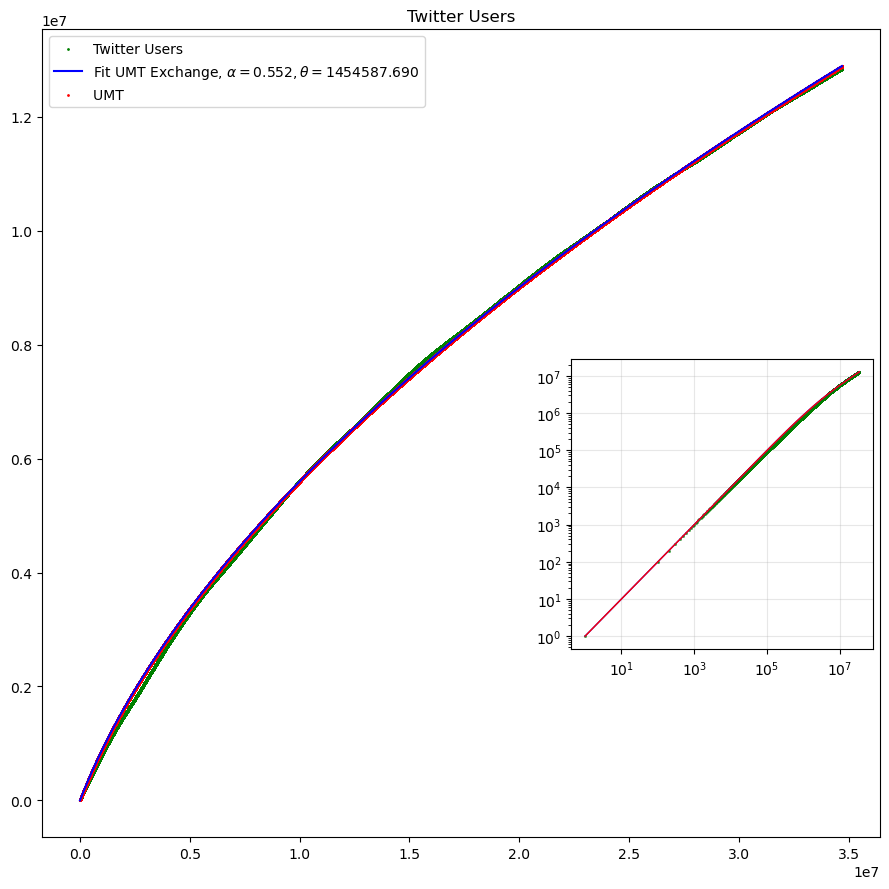

In [87]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Figura principale
fig, ax = plt.subplots(figsize=(9, 9))

# Plot principale (scala lineare)
ax.scatter(heaps_tw_usr.T[0][::100], heaps_tw_usr.T[1][::100], 
           label='Twitter Users', s=1, color='green')
ax.plot(heaps_tw_usr.T[0][::100], heaps_exchange(heaps_tw_usr.T[0][::100], 5.51993719e-01, 1.45458769e+06), 
        label=r'Fit UMT Exchange, $\alpha=0.552,\theta=1454587.690$', color='blue')
ax.scatter(heaps_sim.T[0][::100], heaps_sim.T[1][::100], 
           label='UMT ', s=1, color='red')

ax.set_title('Twitter Users')
ax.legend()

# Creazione dell'inserto
axins = inset_axes(ax, width="60%", height="60%", 
                   bbox_to_anchor=(0.4, 0.001, 0.6, 0.6),
                   bbox_transform=ax.transAxes)

# Plot nell'inserto (scala log-log)
axins.loglog(heaps_tw_usr.T[0][::100], heaps_tw_usr.T[1][::100], 
             's', markersize=1, color='green', alpha=0.7)
axins.loglog(heaps_tw_usr.T[0][::100], heaps_exchange(heaps_tw_usr.T[0][::100], 5.51993719e-01, 1.45458769e+06), 
             '-', color='blue', linewidth=1)
#axins.set_title('Log-Log Scale', fontsize=10)
axins.loglog(heaps_sim.T[0][::100], heaps_sim.T[1][::100], 
             '-', color='red', linewidth=1)
#axins.set_title('Log-Log Scale', fontsize=10)

axins.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('heaps_twitter_users.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
#beta_gut=curve_fit(power_law,heaps_gut.T[0][:],heaps_gut.T[1][:])[0][0]
beta_gut = 0.59

In [48]:
beta_lastfm=curve_fit(power_law,heaps_lastfm.T[0][:],heaps_lastfm.T[1][:])[0][0]

In [49]:
beta_lastfm

0.683283227222901

In [73]:
nov_gut[-1]

149835145.0

In [28]:
print('beta_wiki,beta_gh_repo,beta_gh_usr,beta_lastfm,beta_tw_ht,beta_tw_usr,beta_gut,beta_UMST,beta_book')

beta_wiki,beta_gh_repo,beta_gh_usr,beta_lastfm,beta_tw_ht,beta_tw_usr,beta_gut,beta_UMST,beta_book


In [11]:
beta_wiki,beta_gh_repo,beta_gh_usr,beta_lastfm,beta_tw_ht,beta_tw_usr,beta_gut

(array([ 0.61954507, 15.87220768]),
 array([0.7595268 , 5.85088041]),
 array([ 0.58673176, 58.36222713]),
 array([ 0.68328318, 11.3620021 ]),
 array([0.86324107, 2.14539116]),
 array([ 0.68943225, 82.6114439 ]),
 array([0.58635719, 6.08509418]))

In [92]:
#GAMMA EXPONENTS
gamma_wiki= 1-beta_wiki[0]
gamma_gh_repo = 1-beta_gh_repo[0]
gamma_gh_usr= 1-beta_gh_usr[0]
gamma_lastfm= 1-beta_lastfm[0]
gamma_tw_ht= 1-beta_tw_ht[0]
gamma_tw_usr= 1-beta_tw_usr[0]
gamma_gut= 1-beta_gut[0]
#gamma_UMST= 1-beta_UMST
#gamma_book= 1-beta_book

In [23]:
gamma_tw_usr

0.31056774537318443

In [13]:
#NOVELTIES FOR EACH DATASET
#Wikipedia
dels_wiki_105 = delays(select_time_range(nov_wiki,100000,1),False)
dels_wiki_106 = delays(select_time_range(nov_wiki,1000000,1),False)
dels_wiki_107 = delays(select_time_range(nov_wiki,10000000,1),False)
dels_wiki_full = delays(select_time_range(nov_wiki,len(heaps_wiki),1),False)

#github_repos
dels_gh_repo_105 = delays(select_time_range(nov_gh_repo,100000,1),False)
dels_gh_repo_106 = delays(select_time_range(nov_gh_repo,1000000,1),False)
dels_gh_repo_107 = delays(select_time_range(nov_gh_repo,10000000,1),False)
dels_gh_repo_full = delays(select_time_range(nov_gh_repo,len(heaps_gh_repo),1),False)

#github_users
dels_gh_usr_105 = delays(select_time_range(nov_gh_usr,100000,1),False)
dels_gh_usr_106 = delays(select_time_range(nov_gh_usr,1000000,1),False)
dels_gh_usr_107 = delays(select_time_range(nov_gh_usr,10000000,1),False)
dels_gh_usr_full = delays(select_time_range(nov_gh_usr,len(heaps_gh_usr),1),False)

#lastfm
dels_lastfm_104 = delays(select_time_range(nov_lastfm,10000,1),False)
dels_lastfm_105 = delays(select_time_range(nov_lastfm,100000,1),False)
dels_lastfm_106 = delays(select_time_range(nov_lastfm,1000000,1),False)
dels_lastfm_107 = delays(select_time_range(nov_lastfm,10000000,1),False)
dels_lastfm_full = delays(select_time_range(nov_lastfm,len(heaps_lastfm),1),False)

#twitter_hashtags
dels_twht_105 = delays(select_time_range(nov_tw_ht,100000,1),False)
dels_twht_106 = delays(select_time_range(nov_tw_ht,1000000,1),False)
dels_twht_107 = delays(select_time_range(nov_tw_ht,10000000,1),False)
dels_twht_full = delays(select_time_range(nov_tw_ht,len(heaps_tw_ht),1),False)

#twitter_users
dels_twusr_105 = delays(select_time_range(nov_tw_usr,100000,1),False)
dels_twusr_106 = delays(select_time_range(nov_tw_usr,1000000,1),False)
dels_twusr_107 = delays(select_time_range(nov_tw_usr,10000000,1),False)
dels_twusr_full = delays(select_time_range(nov_tw_usr,len(heaps_tw_usr),1),False)

#gut
dels_gut_105 = delays(select_time_range(nov_gut,100000,1),False)
dels_gut_106 = delays(select_time_range(nov_gut,1000000,1),False)
dels_gut_107 = delays(select_time_range(nov_gut,10000000,1),False)
dels_gut_108 = delays(select_time_range(nov_gut,10000000,1),False)
dels_gut_full = delays(select_time_range(nov_gut,len(heaps_gut),1),False)


In [16]:
beta_wiki,beta_gh_repo,beta_gh_usr,beta_lastfm,beta_tw_ht,beta_tw_usr,beta_gut

(array([ 0.61954507, 15.87220768]),
 array([0.7595268 , 5.85088041]),
 array([ 0.58673176, 58.36222713]),
 array([ 0.68328318, 11.3620021 ]),
 array([0.86324107, 2.14539116]),
 array([ 0.68943225, 82.6114439 ]),
 array([ 0.5442592 , 17.80370255]))

Wikipedia

In [14]:
dels_wiki_105 = delays(select_time_range(nov_wiki,100000,1),False)
dels_wiki_106 = delays(select_time_range(nov_wiki,1000000,1),False)
dels_wiki_107 = delays(select_time_range(nov_wiki,10000000,1),False)
dels_wiki_full = delays(select_time_range(nov_wiki,len(heaps_wiki),1),False)
x_wiki_105, y_wiki_105 = np.unique(dels_wiki_105, return_counts=True)
y_wiki_105 = y_wiki_105 / np.sum(y_wiki_105)  # Normalize the counts to get a probability distribution
x_wiki_106, y_wiki_106 = np.unique(dels_wiki_106, return_counts=True)
y_wiki_106 = y_wiki_106 / np.sum(y_wiki_106)  # Normalize the counts to get a probability distribution
x_wiki_107, y_wiki_107 = np.unique(dels_wiki_107, return_counts=True)
y_wiki_107 = y_wiki_107 / np.sum(y_wiki_107)  # Normalize the counts to get a probability distribution
x_wiki_full, y_wiki_full = np.unique(dels_wiki_full, return_counts=True)
y_wiki_full = y_wiki_full / np.sum(y_wiki_full)  # Normalize the counts to get a probability distribution

In [15]:
len(heaps_wiki)

29606116

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(10,10))
fig.suptitle("Wikipedia ", fontsize=16, y=0.92)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].scatter(x_wiki_105,y_wiki_105, color='c',label=r'$t_{max}=10^{5}$')
ax[0].scatter(x_wiki_106,y_wiki_106 ,color='red',label=r'$t_{max}=10^{6}$')
ax[0].scatter(x_wiki_107,y_wiki_107, color='salmon',label=r'$t_{max}=10^{7}$')
ax[0].scatter(x_wiki_full,y_wiki_full ,color='blue',label=r'$t_{max}=2.9\times 10^{7}$')
ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
#ax[1].grid(True, which='both', linewidth=0.5)
ax[1].scatter(x_wiki_105*100000**(-gamma_wiki),y_wiki_105/(100000**(-gamma_wiki)),color = 'c',label=r'$t_{max}=10^{5}$')
ax[1].scatter(x_wiki_106*1000000**(-gamma_wiki),y_wiki_106/(1000000**(-gamma_wiki)),color = 'red',label=r'$t_{max}=10^{6}$')
ax[1].scatter(x_wiki_107*10000000**(-gamma_wiki),y_wiki_107/(10000000**(-gamma_wiki)),color = 'salmon',label=r'$t_{max}=10^{7}$')
ax[1].scatter(x_wiki_full*29606113**(-gamma_wiki),y_wiki_full/(29606113**(-gamma_wiki)),color = 'blue',label=r'$t_{max}=2.9\times 10^{7}$')
#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
#plt.savefig('wiki_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()

7808525

In [40]:
len(heaps_gut)

151801639

Gutenberg

In [16]:
dels_gut_105 = delays(select_time_range(nov_gut,100000,1),False)
dels_gut_106 = delays(select_time_range(nov_gut,1000000,1),False)
dels_gut_107 = delays(select_time_range(nov_gut,10000000,1),False)
dels_gut_full = delays(select_time_range(nov_gut,len(heaps_gut),1),False)
x_gut_105, y_gut_105 = np.unique(dels_gut_105, return_counts=True)
y_gut_105 = y_gut_105 / np.sum(y_gut_105)  # Normalize the counts to get a probability distribution
x_gut_106, y_gut_106 = np.unique(dels_gut_106, return_counts=True)
y_gut_106 = y_gut_106 / np.sum(y_gut_106)  # Normalize the counts to get a probability distribution
x_gut_107, y_gut_107 = np.unique(dels_gut_107, return_counts=True)
y_gut_107 = y_gut_107 / np.sum(y_gut_107)  # Normalize the counts to get a probability distribution
x_gut_full, y_gut_full = np.unique(dels_gut_full, return_counts=True)
y_gut_full = y_gut_full / np.sum(y_gut_full)  # Normalize the counts to get a probability distribution

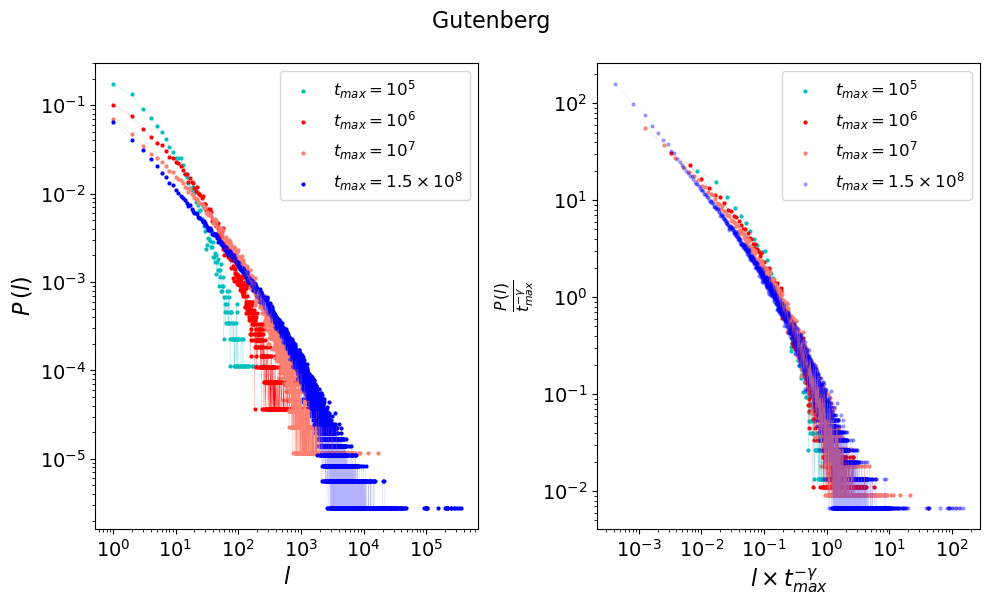

In [75]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Gutenberg ", fontsize=16, y=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel('$l$', fontsize=16)
ax[0].set_ylabel(r'$P\,(l)$', fontsize=16)

ax[0].scatter(x_gut_105,y_gut_105, color='c',label=r'$t_{max}=10^{5}$',s=4)
ax[0].plot(x_gut_105,y_gut_105, color='c',lw=0.1)

ax[0].scatter(x_gut_106,y_gut_106 ,color='red',label=r'$t_{max}=10^{6}$',s=4)
ax[0].plot(x_gut_106,y_gut_106, color='red',lw=0.1)

ax[0].scatter(x_gut_107,y_gut_107, color='salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[0].plot(x_gut_107,y_gut_107, color='salmon',lw=0.1)

ax[0].scatter(x_gut_full,y_gut_full ,color='blue',label=r'$t_{max}=1.5\times 10^{8}$',s=4)
ax[0].plot(x_gut_full,y_gut_full, color='blue',lw=0.1,alpha=0.3)

ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
#ax[1].grid(True, which='both', linewidth=0.5)
ax[1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=16)
ax[1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[1].scatter(x_gut_105*100000**(-gamma_gut),y_gut_105/(100000**(-gamma_gut)),color = 'c',label=r'$t_{max}=10^{5}$',s=4)
ax[1].plot(x_gut_105*100000**(-gamma_gut),y_gut_105/(100000**(-gamma_gut)),color = 'c',lw=0.1)

ax[1].scatter(x_gut_106*1000000**(-gamma_gut),y_gut_106/(1000000**(-gamma_gut)),color = 'red',label=r'$t_{max}=10^{6}$',s=4)
ax[1].plot(x_gut_106*1000000**(-gamma_gut),y_gut_106/(1000000**(-gamma_gut)),color = 'red',lw=0.1)

ax[1].scatter(x_gut_107*10000000**(-gamma_gut),y_gut_107/(10000000**(-gamma_gut)),color = 'salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[1].plot(x_gut_107*10000000**(-gamma_gut),y_gut_107/(10000000**(-gamma_gut)),color = 'salmon',lw=0.1)

ax[1].scatter(x_gut_full*len(heaps_gut)**(-gamma_gut),y_gut_full/(len(heaps_gut)**(-gamma_gut)),color = 'blue',label=r'$t_{max}=1.5\times 10^{8}$',s=4,alpha=0.3)
ax[1].plot(x_gut_full*len(heaps_gut)**(-gamma_gut),y_gut_full/(len(heaps_gut)**(-gamma_gut)),color = 'blue',lw=0.1,alpha=0.3)

#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
plt.tight_layout()
plt.savefig('gut_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
import numpy as np
import os

# Crea una directory per i file se non esiste
output_dir = "delays_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Dizionario con tutti i delays da processare
delays_dict = {
    # Wikipedia
    'wiki_105': dels_wiki_105,
    'wiki_106': dels_wiki_106,
    'wiki_107': dels_wiki_107,
    'wiki_full': dels_wiki_full,
    
    # GitHub repos
    'gh_repo_105': dels_gh_repo_105,
    'gh_repo_106': dels_gh_repo_106,
    'gh_repo_107': dels_gh_repo_107,
    'gh_repo_full': dels_gh_repo_full,
    
    # GitHub users
    'gh_usr_105': dels_gh_usr_105,
    'gh_usr_106': dels_gh_usr_106,
    'gh_usr_107': dels_gh_usr_107,
    'gh_usr_full': dels_gh_usr_full,
    
    # LastFM
    'lastfm_104': dels_lastfm_104,
    'lastfm_105': dels_lastfm_105,
    'lastfm_106': dels_lastfm_106,
    'lastfm_107': dels_lastfm_107,
    'lastfm_full': dels_lastfm_full,
    
    # Twitter hashtags
    'twht_105': dels_twht_105,
    'twht_106': dels_twht_106,
    'twht_107': dels_twht_107,
    'twht_full': dels_twht_full,
    
    # Twitter users
    'twusr_105': dels_twusr_105,
    'twusr_106': dels_twusr_106,
    'twusr_107': dels_twusr_107,
    'twusr_full': dels_twusr_full,
    
    # Gutenberg
    'gut_105': dels_gut_105,
    'gut_106': dels_gut_106,
    'gut_107': dels_gut_107,
    'gut_108': dels_gut_108,
    'gut_full': dels_gut_full
}

# Processamento e salvataggio automatico
for name, delays in delays_dict.items():
    print(f"Processando {name}...")
    
    # Calcola unique values e counts
    x_vals, y_counts = np.unique(delays, return_counts=True)
    
    # Normalizza per ottenere la distribuzione di probabilità
    y_normalized = y_counts / np.sum(y_counts)
    
    # Nome del file
    filename = f"{output_dir}/{name}_xy.txt"
    
    # Salva in file txt con due colonne: x e y
    with open(filename, 'w') as f:
        f.write("# x y\n")  # Header opzionale
        for x, y in zip(x_vals, y_normalized):
            f.write(f"{x} {y}\n")
    
    print(f"  - Salvato {filename}: {len(x_vals)} valori")

print(f"\nProcessamento completato!")
print(f"Totale file salvati: {len(delays_dict)}")
print(f"Directory: {output_dir}/")

# Lista dei file creati
print("\nFile creati:")
for name in delays_dict.keys():
    print(f"  - {name}_xy.txt")

# Esempio di come ricaricare i dati
print("\nPer ricaricare i dati usa:")
print("x_vals, y_vals = np.loadtxt('delays_data/wiki_105_xy.txt', unpack=True)")
print("# oppure:")
print("data = np.loadtxt('delays_data/wiki_105_xy.txt')")
print("x_vals, y_vals = data[:, 0], data[:, 1]")

Processando wiki_105...
  - Salvato delays_data/wiki_105_xy.txt: 58 valori
Processando wiki_106...
  - Salvato delays_data/wiki_106_xy.txt: 215 valori
Processando wiki_107...
  - Salvato delays_data/wiki_107_xy.txt: 730 valori
Processando wiki_full...
  - Salvato delays_data/wiki_full_xy.txt: 1189 valori
Processando gh_repo_105...
  - Salvato delays_data/gh_repo_105_xy.txt: 38 valori
Processando gh_repo_106...
  - Salvato delays_data/gh_repo_106_xy.txt: 62 valori
Processando gh_repo_107...
  - Salvato delays_data/gh_repo_107_xy.txt: 131 valori
Processando gh_repo_full...
  - Salvato delays_data/gh_repo_full_xy.txt: 142 valori
Processando gh_usr_105...
  - Salvato delays_data/gh_usr_105_xy.txt: 46 valori
Processando gh_usr_106...
  - Salvato delays_data/gh_usr_106_xy.txt: 73 valori
Processando gh_usr_107...
  - Salvato delays_data/gh_usr_107_xy.txt: 218 valori
Processando gh_usr_full...
  - Salvato delays_data/gh_usr_full_xy.txt: 260 valori
Processando lastfm_104...
  - Salvato delays_d

In [26]:
np.log(100000**(-gamma_wiki))

array([ -4.3801492 , 171.22261847])

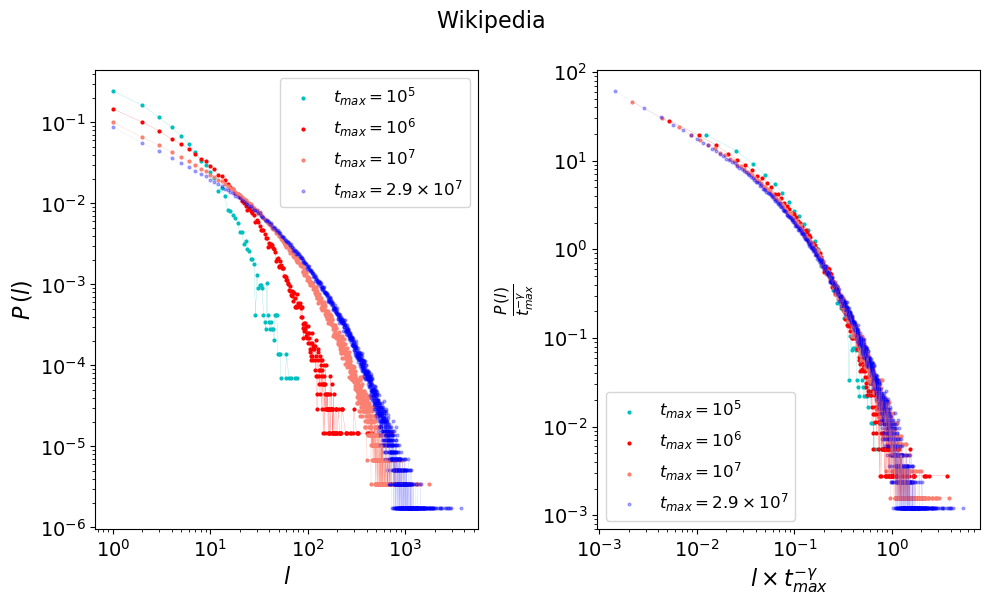

In [74]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Wikipedia ", fontsize=16, y=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel('$l$', fontsize=16)
ax[0].set_ylabel(r'$P\,(l)$', fontsize=16)

ax[0].scatter(x_wiki_105,y_wiki_105, color='c',label=r'$t_{max}=10^{5}$',s=4)
ax[0].plot(x_wiki_105,y_wiki_105, color='c',lw=0.1)

ax[0].scatter(x_wiki_106,y_wiki_106 ,color='red',label=r'$t_{max}=10^{6}$',s=4)
ax[0].plot(x_wiki_106,y_wiki_106, color='red',lw=0.1)

ax[0].scatter(x_wiki_107,y_wiki_107, color='salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[0].plot(x_wiki_107,y_wiki_107, color='salmon',lw=0.1)

ax[0].scatter(x_wiki_full,y_wiki_full ,color='blue',label=r'$t_{max}=2.9\times 10^{7}$',s=4,alpha=0.3)
ax[0].plot(x_wiki_full,y_wiki_full, color='blue',lw=0.1,alpha=0.3)

ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=16)
ax[1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].scatter(x_wiki_105*100000**(-gamma_wiki),y_wiki_105/(100000**(-gamma_wiki)),color = 'c',label=r'$t_{max}=10^{5}$',s=4)
ax[1].plot(x_wiki_105*100000**(-gamma_wiki),y_wiki_105/(100000**(-gamma_wiki)),color = 'c',lw=0.1)

ax[1].scatter(x_wiki_106*1000000**(-gamma_wiki),y_wiki_106/(1000000**(-gamma_wiki)),color = 'red',label=r'$t_{max}=10^{6}$',s=4)
ax[1].plot(x_wiki_106*1000000**(-gamma_wiki),y_wiki_106/(1000000**(-gamma_wiki)),color = 'red',lw=0.1)

ax[1].scatter(x_wiki_107*10000000**(-gamma_wiki),y_wiki_107/(10000000**(-gamma_wiki)),color = 'salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[1].plot(x_wiki_107*10000000**(-gamma_wiki),y_wiki_107/(10000000**(-gamma_wiki)),color = 'salmon',lw=0.1)

ax[1].scatter(x_wiki_full*29606113**(-gamma_wiki),y_wiki_full/(29606113**(-gamma_wiki)),color = 'blue',label=r'$t_{max}=2.9\times 10^{7}$',s=4,alpha=0.3)
ax[1].plot(x_wiki_full*29606113**(-gamma_wiki),y_wiki_full/(29606113**(-gamma_wiki)),color = 'blue',lw=0.1,alpha=0.3)

#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
plt.tight_layout()
plt.savefig('wiki_scaling_2.pdf', dpi=300, bbox_inches='tight')
plt.show()

TWITTER HASHTAGS

In [50]:
nov_tw_ht[-1]

34696971.0

In [59]:
dels_tw_ht_105 = delays(select_time_range(nov_tw_ht,100000,1),False)
dels_tw_ht_106 = delays(select_time_range(nov_tw_ht,1000000,1),False)
dels_tw_ht_107 = delays(select_time_range(nov_tw_ht,10000000,1),False)
dels_tw_ht_full = delays(select_time_range(nov_tw_ht,len(heaps_tw_ht),1),False)
x_tw_ht_105, y_tw_ht_105 = np.unique(dels_tw_ht_105, return_counts=True)
y_tw_ht_105 = y_tw_ht_105 / np.sum(y_tw_ht_105)  # Normalize the counts to get a probability distribution
x_tw_ht_106, y_tw_ht_106 = np.unique(dels_tw_ht_106, return_counts=True)
y_tw_ht_106 = y_tw_ht_106 / np.sum(y_tw_ht_106)  # Normalize the counts to get a probability distribution
x_tw_ht_107, y_tw_ht_107 = np.unique(dels_tw_ht_107, return_counts=True)
y_tw_ht_107 = y_tw_ht_107 / np.sum(y_tw_ht_107)  # Normalize the counts to get a probability distribution
x_tw_ht_full, y_tw_ht_full = np.unique(dels_tw_ht_full, return_counts=True)
y_tw_ht_full = y_tw_ht_full / np.sum(y_tw_ht_full)  # Normalize the counts to get a probability distribution

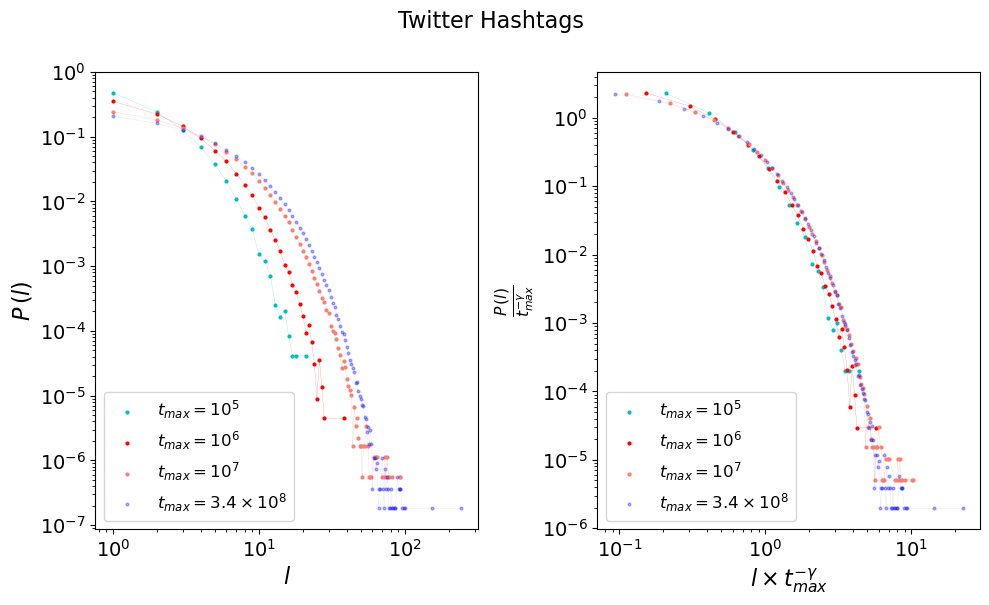

In [73]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Twitter Hashtags ", fontsize=16, y=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel('$l$', fontsize=16)
ax[0].set_ylabel(r'$P\,(l)$', fontsize=16)

ax[0].scatter(x_tw_ht_105,y_tw_ht_105, color='c',label=r'$t_{max}=10^{5}$',s=4)
ax[0].plot(x_tw_ht_105,y_tw_ht_105, color='c',lw=0.1)

ax[0].scatter(x_tw_ht_106,y_tw_ht_106 ,color='red',label=r'$t_{max}=10^{6}$',s=4)
ax[0].plot(x_tw_ht_106,y_tw_ht_106, color='red',lw=0.1)

ax[0].scatter(x_tw_ht_107,y_tw_ht_107, color='salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[0].plot(x_tw_ht_107,y_tw_ht_107, color='salmon',lw=0.1)

ax[0].scatter(x_tw_ht_full,y_tw_ht_full ,color='blue',label=r'$t_{max}=3.4\times 10^{8}$',s=4,alpha=0.3)
ax[0].plot(x_tw_ht_full,y_tw_ht_full, color='blue',lw=0.1,alpha=0.3)

ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=16)
ax[1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].scatter(x_tw_ht_105*100000**(-gamma_tw_ht),y_tw_ht_105/(100000**(-gamma_tw_ht)),color = 'c',label=r'$t_{max}=10^{5}$',s=4)
ax[1].plot(x_tw_ht_105*100000**(-gamma_tw_ht),y_tw_ht_105/(100000**(-gamma_tw_ht)),color = 'c',lw=0.1)

ax[1].scatter(x_tw_ht_106*1000000**(-gamma_tw_ht),y_tw_ht_106/(1000000**(-gamma_tw_ht)),color = 'red',label=r'$t_{max}=10^{6}$',s=4)
ax[1].plot(x_tw_ht_106*1000000**(-gamma_tw_ht),y_tw_ht_106/(1000000**(-gamma_tw_ht)),color = 'red',lw=0.1)

ax[1].scatter(x_tw_ht_107*10000000**(-gamma_tw_ht),y_tw_ht_107/(10000000**(-gamma_tw_ht)),color = 'salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[1].plot(x_tw_ht_107*10000000**(-gamma_tw_ht),y_tw_ht_107/(10000000**(-gamma_tw_ht)),color = 'salmon',lw=0.1)

ax[1].scatter(x_tw_ht_full*len(heaps_tw_ht)**(-gamma_tw_ht),y_tw_ht_full/(len(heaps_tw_ht)**(-gamma_tw_ht)),color = 'blue',label=r'$t_{max}=3.4\times 10^{8}$',s=4,alpha=0.3)
ax[1].plot(x_tw_ht_full*len(heaps_tw_ht)**(-gamma_tw_ht),y_tw_ht_full/(len(heaps_tw_ht)**(-gamma_tw_ht)),color = 'blue',lw=0.1,alpha=0.3)

#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
plt.tight_layout()
plt.savefig('tw_ht_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()

TWITTER USERS

In [19]:
gamma_tw_usr

0.31056774537318443

In [17]:
dels_tw_usr_105 = delays(select_time_range(nov_tw_usr,100000,1),False)
dels_tw_usr_106 = delays(select_time_range(nov_tw_usr,1000000,1),False)
dels_tw_usr_107 = delays(select_time_range(nov_tw_usr,10000000,1),False)
dels_tw_usr_full = delays(select_time_range(nov_tw_usr,len(heaps_tw_usr),1),False)
x_tw_usr_105, y_tw_usr_105 = np.unique(dels_tw_usr_105, return_counts=True)
y_tw_usr_105 = y_tw_usr_105 / np.sum(y_tw_usr_105)  # Normalize the counts to get a probability distribution
x_tw_usr_106, y_tw_usr_106 = np.unique(dels_tw_usr_106, return_counts=True)
y_tw_usr_106 = y_tw_usr_106 / np.sum(y_tw_usr_106)  # Normalize the counts to get a probability distribution
x_tw_usr_107, y_tw_usr_107 = np.unique(dels_tw_usr_107, return_counts=True)
y_tw_usr_107 = y_tw_usr_107 / np.sum(y_tw_usr_107)  # Normalize the counts to get a probability distribution
x_tw_usr_full, y_tw_usr_full = np.unique(dels_tw_usr_full, return_counts=True)
y_tw_usr_full = y_tw_usr_full / np.sum(y_tw_usr_full)  # Normalize the counts to get a probability distribution

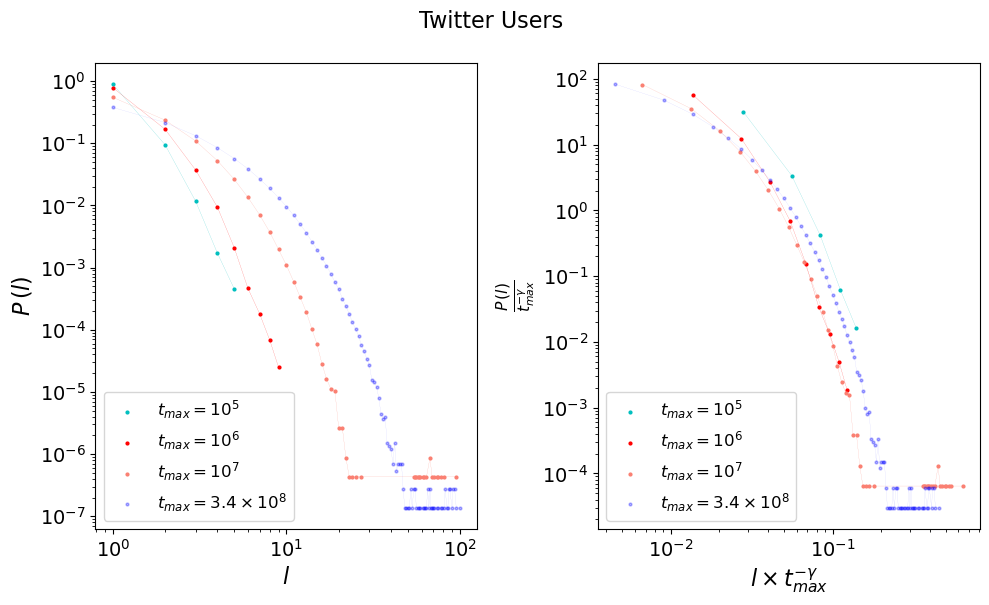

In [72]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Twitter Users ", fontsize=16, y=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel('$l$', fontsize=16)
ax[0].set_ylabel(r'$P\,(l)$', fontsize=16)

ax[0].scatter(x_tw_usr_105,y_tw_usr_105, color='c',label=r'$t_{max}=10^{5}$',s=4)
ax[0].plot(x_tw_usr_105,y_tw_usr_105, color='c',lw=0.1)

ax[0].scatter(x_tw_usr_106,y_tw_usr_106 ,color='red',label=r'$t_{max}=10^{6}$',s=4)
ax[0].plot(x_tw_usr_106,y_tw_usr_106, color='red',lw=0.1)

ax[0].scatter(x_tw_usr_107,y_tw_usr_107, color='salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[0].plot(x_tw_usr_107,y_tw_usr_107, color='salmon',lw=0.1)

ax[0].scatter(x_tw_usr_full,y_tw_usr_full ,color='blue',label=r'$t_{max}=3.4\times 10^{8}$',s=4,alpha=0.3)
ax[0].plot(x_tw_usr_full,y_tw_usr_full, color='blue',lw=0.1,alpha=0.3)

ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=16)
ax[1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].scatter(x_tw_usr_105*100000**(-gamma_tw_usr),y_tw_usr_105/(100000**(-gamma_tw_usr)),color = 'c',label=r'$t_{max}=10^{5}$',s=4)
ax[1].plot(x_tw_usr_105*100000**(-gamma_tw_usr),y_tw_usr_105/(100000**(-gamma_tw_usr)),color = 'c',lw=0.1)

ax[1].scatter(x_tw_usr_106*1000000**(-gamma_tw_usr),y_tw_usr_106/(1000000**(-gamma_tw_usr)),color = 'red',label=r'$t_{max}=10^{6}$',s=4)
ax[1].plot(x_tw_usr_106*1000000**(-gamma_tw_usr),y_tw_usr_106/(1000000**(-gamma_tw_usr)),color = 'red',lw=0.1)

ax[1].scatter(x_tw_usr_107*10000000**(-gamma_tw_usr),y_tw_usr_107/(10000000**(-gamma_tw_usr)),color = 'salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[1].plot(x_tw_usr_107*10000000**(-gamma_tw_usr),y_tw_usr_107/(10000000**(-gamma_tw_usr)),color = 'salmon',lw=0.1)

ax[1].scatter(x_tw_usr_full*len(heaps_tw_usr)**(-gamma_tw_usr),y_tw_usr_full/(len(heaps_tw_usr)**(-gamma_tw_usr)),color = 'blue',label=r'$t_{max}=3.4\times 10^{8}$',s=4,alpha=0.3)
ax[1].plot(x_tw_usr_full*len(heaps_tw_usr)**(-gamma_tw_usr),y_tw_usr_full/(len(heaps_tw_usr)**(-gamma_tw_usr)),color = 'blue',lw=0.1,alpha=0.3)

#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
plt.tight_layout()
plt.savefig('tw_usrs_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [68]:
dels_gh_repo_105 = delays(select_time_range(nov_gh_repo,100000,1),False)
dels_gh_repo_106 = delays(select_time_range(nov_gh_repo,1000000,1),False)
dels_gh_repo_107 = delays(select_time_range(nov_gh_repo,10000000,1),False)
dels_gh_repo_full = delays(select_time_range(nov_gh_repo,len(heaps_gh_repo),1),False)
x_gh_repo_105, y_gh_repo_105 = np.unique(dels_gh_repo_105, return_counts=True)
y_gh_repo_105 = y_gh_repo_105 / np.sum(y_gh_repo_105)  # Normalize the counts to get a probability distribution
x_gh_repo_106, y_gh_repo_106 = np.unique(dels_gh_repo_106, return_counts=True)
y_gh_repo_106 = y_gh_repo_106 / np.sum(y_gh_repo_106)  # Normalize the counts to get a probability distribution
x_gh_repo_107, y_gh_repo_107 = np.unique(dels_gh_repo_107, return_counts=True)
y_gh_repo_107 = y_gh_repo_107 / np.sum(y_gh_repo_107)  # Normalize the counts to get a probability distribution
x_gh_repo_full, y_gh_repo_full = np.unique(dels_gh_repo_full, return_counts=True)
y_gh_repo_full = y_gh_repo_full / np.sum(y_gh_repo_full)  # Normalize the counts to get a probability distribution

In [66]:
len(heaps_gh_repo)

13684536

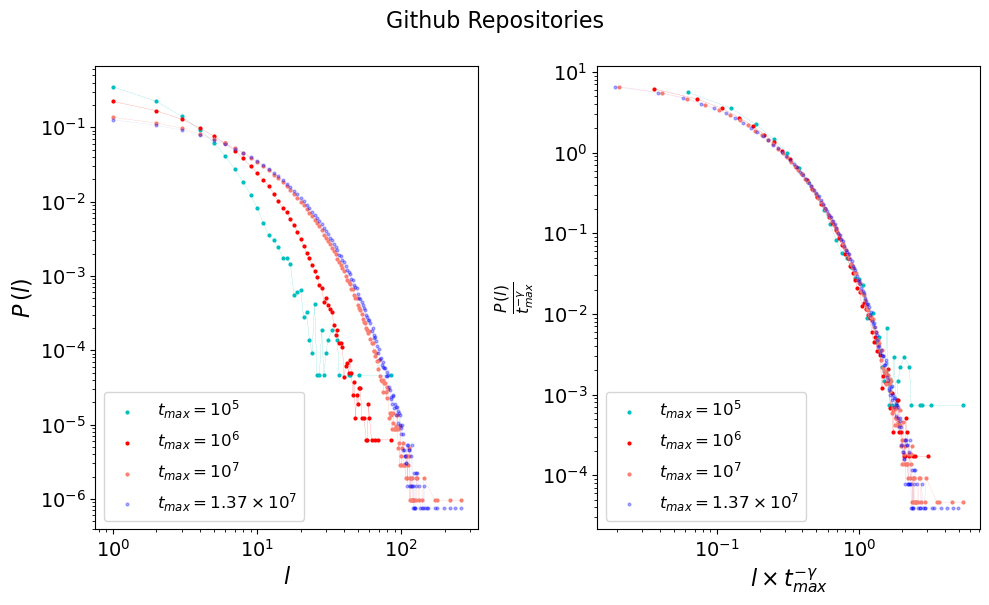

In [71]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Github Repositories", fontsize=16, y=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel('$l$', fontsize=16)
ax[0].set_ylabel(r'$P\,(l)$', fontsize=16)

ax[0].scatter(x_gh_repo_105,y_gh_repo_105, color='c',label=r'$t_{max}=10^{5}$',s=4)
ax[0].plot(x_gh_repo_105,y_gh_repo_105, color='c',lw=0.1)

ax[0].scatter(x_gh_repo_106,y_gh_repo_106 ,color='red',label=r'$t_{max}=10^{6}$',s=4)
ax[0].plot(x_gh_repo_106,y_gh_repo_106, color='red',lw=0.1)

ax[0].scatter(x_gh_repo_107,y_gh_repo_107, color='salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[0].plot(x_gh_repo_107,y_gh_repo_107, color='salmon',lw=0.1)

ax[0].scatter(x_gh_repo_full,y_gh_repo_full ,color='blue',label=r'$t_{max}=1.37\times 10^{7}$',s=4,alpha=0.3)
ax[0].plot(x_gh_repo_full,y_gh_repo_full, color='blue',lw=0.1,alpha=0.3)

ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=16)
ax[1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].scatter(x_gh_repo_105*100000**(-gamma_gh_repo),y_gh_repo_105/(100000**(-gamma_gh_repo)),color = 'c',label=r'$t_{max}=10^{5}$',s=4)
ax[1].plot(x_gh_repo_105*100000**(-gamma_gh_repo),y_gh_repo_105/(100000**(-gamma_gh_repo)),color = 'c',lw=0.1)

ax[1].scatter(x_gh_repo_106*1000000**(-gamma_gh_repo),y_gh_repo_106/(1000000**(-gamma_gh_repo)),color = 'red',label=r'$t_{max}=10^{6}$',s=4)
ax[1].plot(x_gh_repo_106*1000000**(-gamma_gh_repo),y_gh_repo_106/(1000000**(-gamma_gh_repo)),color = 'red',lw=0.1)

ax[1].scatter(x_gh_repo_107*10000000**(-gamma_gh_repo),y_gh_repo_107/(10000000**(-gamma_gh_repo)),color = 'salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[1].plot(x_gh_repo_107*10000000**(-gamma_gh_repo),y_gh_repo_107/(10000000**(-gamma_gh_repo)),color = 'salmon',lw=0.1)

ax[1].scatter(x_gh_repo_full*len(heaps_gh_repo)**(-gamma_gh_repo),y_gh_repo_full/(len(heaps_gh_repo)**(-gamma_gh_repo)),color = 'blue',label=r'$t_{max}=1.37\times 10^{7}$',s=4,alpha=0.3)
ax[1].plot(x_gh_repo_full*len(heaps_gh_repo)**(-gamma_gh_repo),y_gh_repo_full/(len(heaps_gh_repo)**(-gamma_gh_repo)),color = 'blue',lw=0.1,alpha=0.3)

#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
plt.tight_layout()
plt.savefig('gh_repos_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
dels_gh_usr_105 = delays(select_time_range(nov_gh_usr,100000,1),False)
dels_gh_usr_106 = delays(select_time_range(nov_gh_usr,1000000,1),False)
dels_gh_usr_107 = delays(select_time_range(nov_gh_usr,10000000,1),False)
dels_gh_usr_full = delays(select_time_range(nov_gh_usr,len(heaps_gh_usr),1),False)
x_gh_usr_105, y_gh_usr_105 = np.unique(dels_gh_usr_105, return_counts=True)
y_gh_usr_105 = y_gh_usr_105 / np.sum(y_gh_usr_105)  # Normalize the counts to get a probability distribution
x_gh_usr_106, y_gh_usr_106 = np.unique(dels_gh_usr_106, return_counts=True)
y_gh_usr_106 = y_gh_usr_106 / np.sum(y_gh_usr_106)  # Normalize the counts to get a probability distribution
x_gh_usr_107, y_gh_usr_107 = np.unique(dels_gh_usr_107, return_counts=True)
y_gh_usr_107 = y_gh_usr_107 / np.sum(y_gh_usr_107)  # Normalize the counts to get a probability distribution
x_gh_usr_full, y_gh_usr_full = np.unique(dels_gh_usr_full, return_counts=True)
y_gh_usr_full = y_gh_usr_full / np.sum(y_gh_usr_full)  # Normalize the counts to get a probability distribution

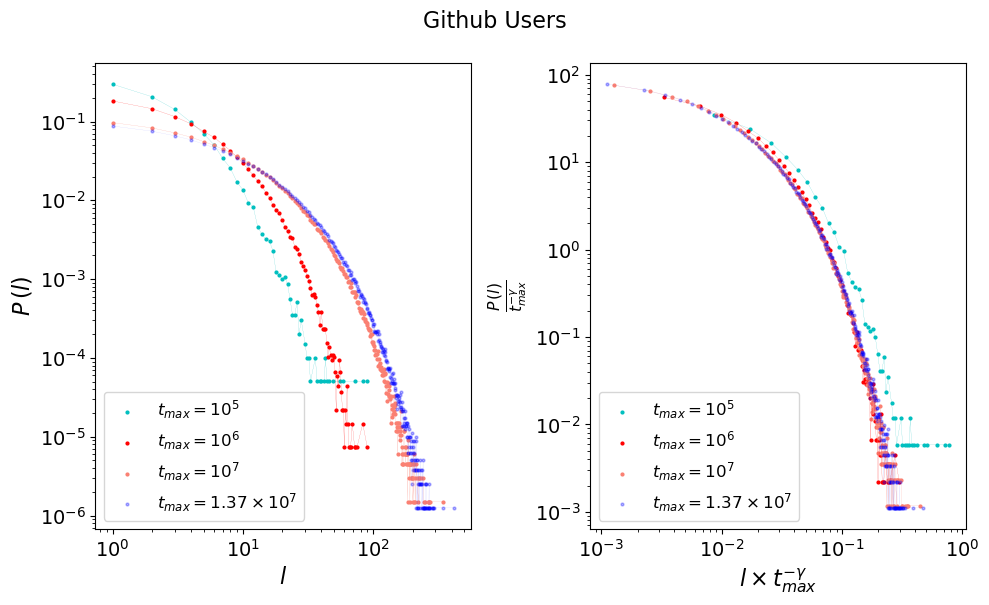

In [77]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("Github Users", fontsize=16, y=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel('$l$', fontsize=16)
ax[0].set_ylabel(r'$P\,(l)$', fontsize=16)

ax[0].scatter(x_gh_usr_105,y_gh_usr_105, color='c',label=r'$t_{max}=10^{5}$',s=4)
ax[0].plot(x_gh_usr_105,y_gh_usr_105, color='c',lw=0.1)

ax[0].scatter(x_gh_usr_106,y_gh_usr_106 ,color='red',label=r'$t_{max}=10^{6}$',s=4)
ax[0].plot(x_gh_usr_106,y_gh_usr_106, color='red',lw=0.1)

ax[0].scatter(x_gh_usr_107,y_gh_usr_107, color='salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[0].plot(x_gh_usr_107,y_gh_usr_107, color='salmon',lw=0.1)

ax[0].scatter(x_gh_usr_full,y_gh_usr_full ,color='blue',label=r'$t_{max}=1.37\times 10^{7}$',s=4,alpha=0.3)
ax[0].plot(x_gh_usr_full,y_gh_usr_full, color='blue',lw=0.1,alpha=0.3)

ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=16)
ax[1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].scatter(x_gh_usr_105*100000**(-gamma_gh_usr),y_gh_usr_105/(100000**(-gamma_gh_usr)),color = 'c',label=r'$t_{max}=10^{5}$',s=4)
ax[1].plot(x_gh_usr_105*100000**(-gamma_gh_usr),y_gh_usr_105/(100000**(-gamma_gh_usr)),color = 'c',lw=0.1)

ax[1].scatter(x_gh_usr_106*1000000**(-gamma_gh_usr),y_gh_usr_106/(1000000**(-gamma_gh_usr)),color = 'red',label=r'$t_{max}=10^{6}$',s=4)
ax[1].plot(x_gh_usr_106*1000000**(-gamma_gh_usr),y_gh_usr_106/(1000000**(-gamma_gh_usr)),color = 'red',lw=0.1)

ax[1].scatter(x_gh_usr_107*10000000**(-gamma_gh_usr),y_gh_usr_107/(10000000**(-gamma_gh_usr)),color = 'salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[1].plot(x_gh_usr_107*10000000**(-gamma_gh_usr),y_gh_usr_107/(10000000**(-gamma_gh_usr)),color = 'salmon',lw=0.1)

ax[1].scatter(x_gh_usr_full*len(heaps_gh_usr)**(-gamma_gh_usr),y_gh_usr_full/(len(heaps_gh_usr)**(-gamma_gh_usr)),color = 'blue',label=r'$t_{max}=1.37\times 10^{7}$',s=4,alpha=0.3)
ax[1].plot(x_gh_usr_full*len(heaps_gh_usr)**(-gamma_gh_usr),y_gh_usr_full/(len(heaps_gh_usr)**(-gamma_gh_usr)),color = 'blue',lw=0.1,alpha=0.3)

#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
plt.tight_layout()
plt.savefig('gh_usr_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
dels_lastfm_105 = delays(select_time_range(nov_lastfm,100000,1),False)
dels_lastfm_106 = delays(select_time_range(nov_lastfm,1000000,1),False)
dels_lastfm_107 = delays(select_time_range(nov_lastfm,10000000,1),False)
dels_lastfm_full = delays(select_time_range(nov_lastfm,len(heaps_lastfm),1),False)
x_lastfm_105, y_lastfm_105 = np.unique(dels_lastfm_105, return_counts=True)
y_lastfm_105 = y_lastfm_105 / np.sum(y_lastfm_105)  # Normalize the counts to get a probability distribution
x_lastfm_106, y_lastfm_106 = np.unique(dels_lastfm_106, return_counts=True)
y_lastfm_106 = y_lastfm_106 / np.sum(y_lastfm_106)  # Normalize the counts to get a probability distribution
x_lastfm_107, y_lastfm_107 = np.unique(dels_lastfm_107, return_counts=True)
y_lastfm_107 = y_lastfm_107 / np.sum(y_lastfm_107)  # Normalize the counts to get a probability distribution
x_lastfm_full, y_lastfm_full = np.unique(dels_lastfm_full, return_counts=True)
y_lastfm_full = y_lastfm_full / np.sum(y_lastfm_full)  # Normalize the counts to get a probability distribution

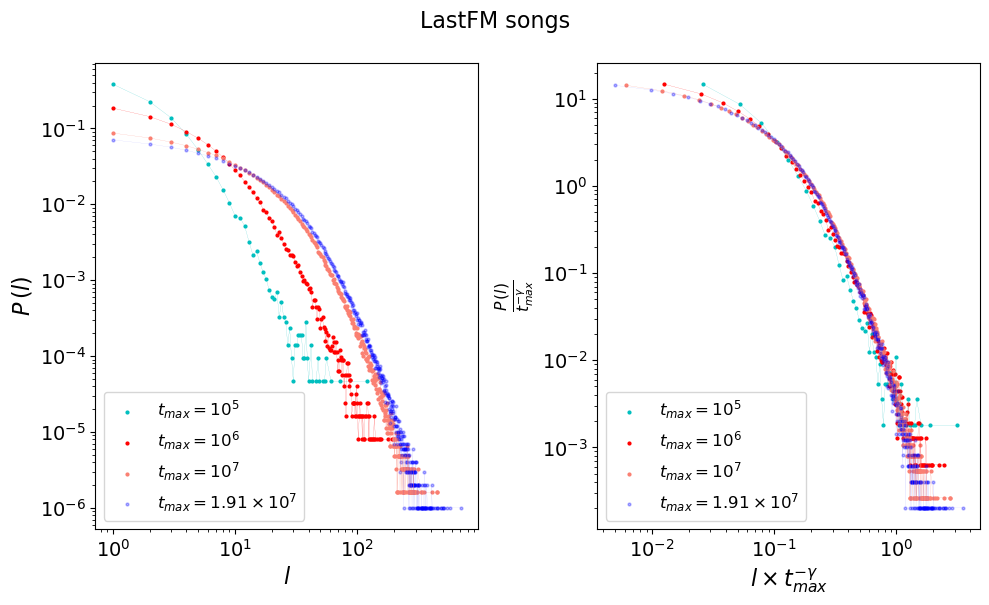

In [81]:
fig, ax = plt.subplots(1, 2,figsize=(10,6))
fig.suptitle("LastFM songs", fontsize=16, y=1)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel('$l$', fontsize=16)
ax[0].set_ylabel(r'$P\,(l)$', fontsize=16)

ax[0].scatter(x_lastfm_105,y_lastfm_105, color='c',label=r'$t_{max}=10^{5}$',s=4)
ax[0].plot(x_lastfm_105,y_lastfm_105, color='c',lw=0.1)

ax[0].scatter(x_lastfm_106,y_lastfm_106 ,color='red',label=r'$t_{max}=10^{6}$',s=4)
ax[0].plot(x_lastfm_106,y_lastfm_106, color='red',lw=0.1)

ax[0].scatter(x_lastfm_107,y_lastfm_107, color='salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[0].plot(x_lastfm_107,y_lastfm_107, color='salmon',lw=0.1)

ax[0].scatter(x_lastfm_full,y_lastfm_full ,color='blue',label=r'$t_{max}=1.91\times 10^{7}$',s=4,alpha=0.3)
ax[0].plot(x_lastfm_full,y_lastfm_full, color='blue',lw=0.1,alpha=0.3)

ax[0].legend(fontsize=12)

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=16)
ax[1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].scatter(x_lastfm_105*100000**(-gamma_lastfm),y_lastfm_105/(100000**(-gamma_lastfm)),color = 'c',label=r'$t_{max}=10^{5}$',s=4)
ax[1].plot(x_lastfm_105*100000**(-gamma_lastfm),y_lastfm_105/(100000**(-gamma_lastfm)),color = 'c',lw=0.1)

ax[1].scatter(x_lastfm_106*1000000**(-gamma_lastfm),y_lastfm_106/(1000000**(-gamma_lastfm)),color = 'red',label=r'$t_{max}=10^{6}$',s=4)
ax[1].plot(x_lastfm_106*1000000**(-gamma_lastfm),y_lastfm_106/(1000000**(-gamma_lastfm)),color = 'red',lw=0.1)

ax[1].scatter(x_lastfm_107*10000000**(-gamma_lastfm),y_lastfm_107/(10000000**(-gamma_lastfm)),color = 'salmon',label=r'$t_{max}=10^{7}$',s=4)
ax[1].plot(x_lastfm_107*10000000**(-gamma_lastfm),y_lastfm_107/(10000000**(-gamma_lastfm)),color = 'salmon',lw=0.1)

ax[1].scatter(x_lastfm_full*len(heaps_lastfm)**(-gamma_lastfm),y_lastfm_full/(len(heaps_lastfm)**(-gamma_lastfm)),color = 'blue',label=r'$t_{max}=1.91\times 10^{7}$',s=4,alpha=0.3)
ax[1].plot(x_lastfm_full*len(heaps_lastfm)**(-gamma_lastfm),y_lastfm_full/(len(heaps_lastfm)**(-gamma_lastfm)),color = 'blue',lw=0.1,alpha=0.3)

#ax[1].grid(True, which='both', linewidth=0.5)

ax[1].legend(fontsize=12)
#ax[1].yaxis.set_visible(False)
#ax[1].text(1.05, 0.5, 'Wikipedia', transform=ax[0][1].transAxes, rotation=90, 
#        va='center', ha='left',fontsize = 18)
plt.tight_layout()
plt.savefig('lastfm_scaling.pdf', dpi=300, bbox_inches='tight')
plt.show()

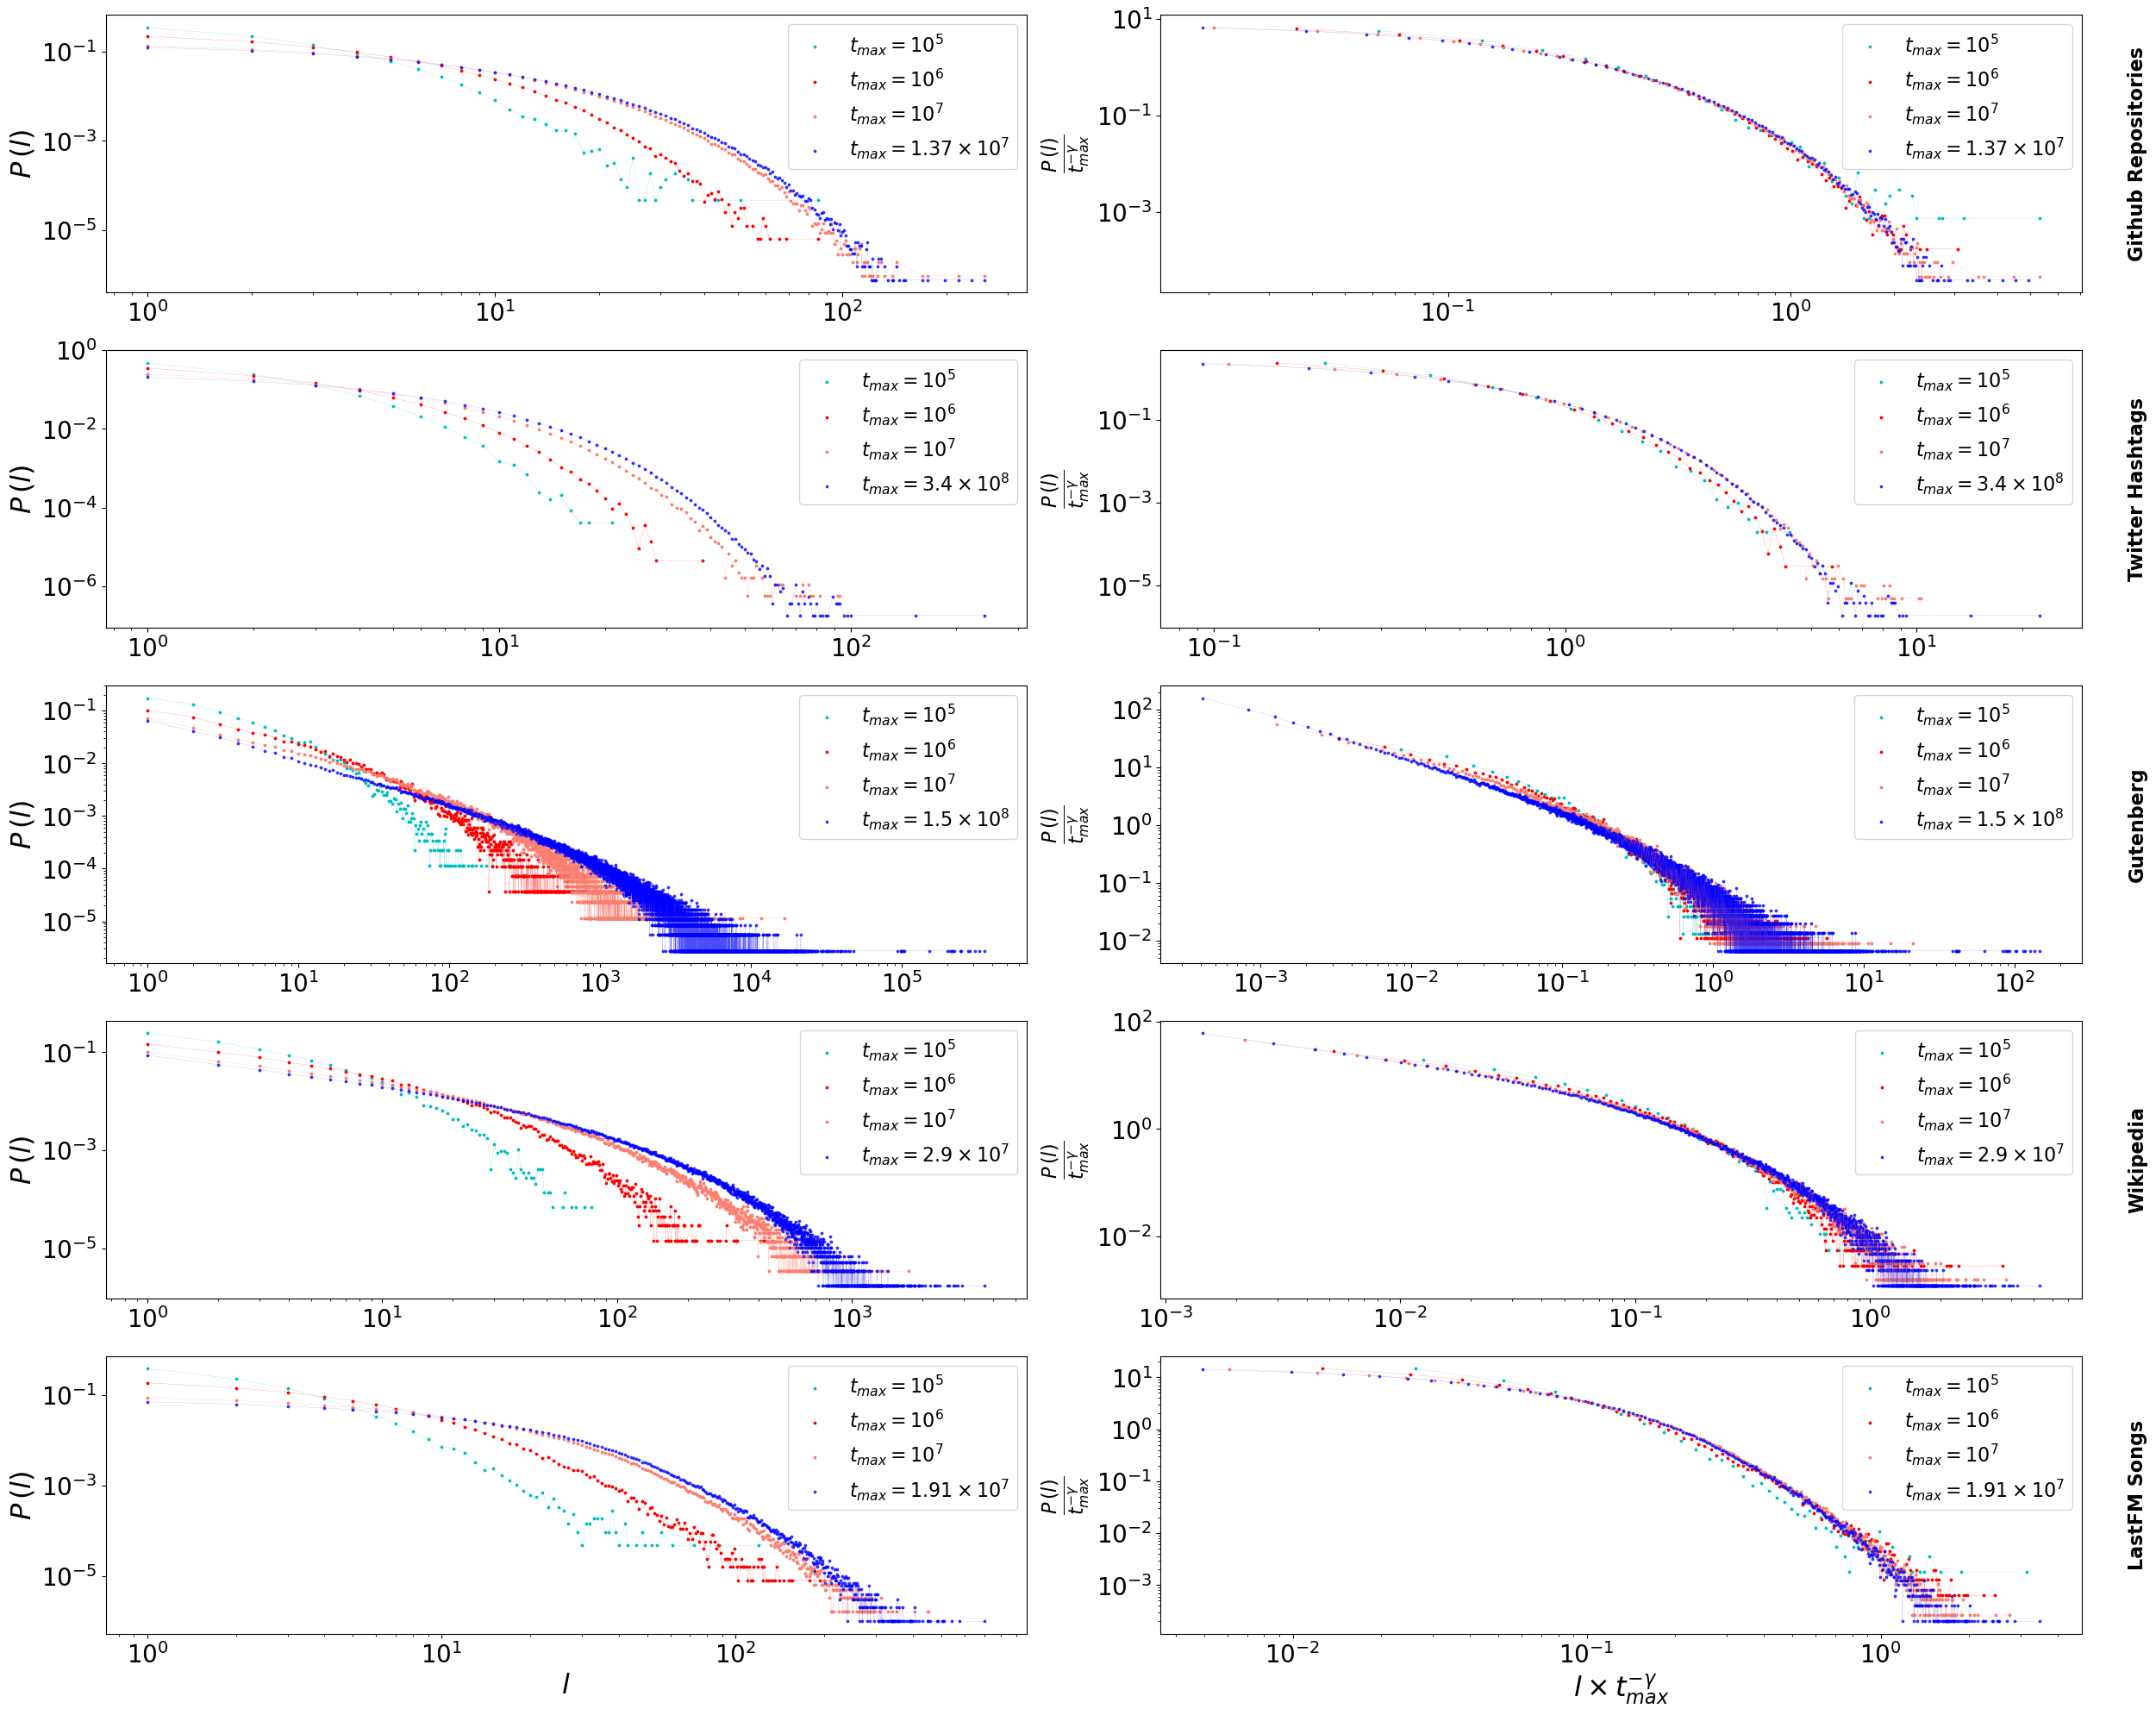

In [118]:
fig, ax = plt.subplots(5, 2, figsize=(25, 20))

# Rimuovi spaziatura tra subplot
plt.subplots_adjust(hspace=0.15, wspace=0.3)

# Dimensioni dei font
tick_size = 20
legend_size = 16
label_size = 23

# Dataset names per le righe
dataset_names = ['Github Repositories', 'Twitter Hashtags', 'Gutenberg', 'Wikipedia', 'LastFM Songs']

# ROW 1: Github Repositories
ax[0,0].set_yscale('log')
ax[0,0].set_xscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=tick_size)
ax[0,0].set_ylabel(r'$P\,(l)$', fontsize=label_size)

ax[0,0].scatter(x_gh_repo_105, y_gh_repo_105, color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[0,0].plot(x_gh_repo_105, y_gh_repo_105, color='c', lw=0.1)
ax[0,0].scatter(x_gh_repo_106, y_gh_repo_106, color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[0,0].plot(x_gh_repo_106, y_gh_repo_106, color='red', lw=0.1)
ax[0,0].scatter(x_gh_repo_107, y_gh_repo_107, color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[0,0].plot(x_gh_repo_107, y_gh_repo_107, color='salmon', lw=0.1)
ax[0,0].scatter(x_gh_repo_full, y_gh_repo_full, color='blue', label=r'$t_{max}=1.37\times 10^{7}$', s=3, alpha=0.7)
ax[0,0].plot(x_gh_repo_full, y_gh_repo_full, color='blue', lw=0.1, alpha=0.7)
ax[0,0].legend(fontsize=legend_size)

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=label_size)
ax[0,1].tick_params(axis='both', which='major', labelsize=tick_size)

ax[0,1].scatter(x_gh_repo_105*100000**(-gamma_gh_repo), y_gh_repo_105/(100000**(-gamma_gh_repo)), color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[0,1].plot(x_gh_repo_105*100000**(-gamma_gh_repo), y_gh_repo_105/(100000**(-gamma_gh_repo)), color='c', lw=0.1)
ax[0,1].scatter(x_gh_repo_106*1000000**(-gamma_gh_repo), y_gh_repo_106/(1000000**(-gamma_gh_repo)), color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[0,1].plot(x_gh_repo_106*1000000**(-gamma_gh_repo), y_gh_repo_106/(1000000**(-gamma_gh_repo)), color='red', lw=0.1)
ax[0,1].scatter(x_gh_repo_107*10000000**(-gamma_gh_repo), y_gh_repo_107/(10000000**(-gamma_gh_repo)), color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[0,1].plot(x_gh_repo_107*10000000**(-gamma_gh_repo), y_gh_repo_107/(10000000**(-gamma_gh_repo)), color='salmon', lw=0.1)
ax[0,1].scatter(x_gh_repo_full*len(heaps_gh_repo)**(-gamma_gh_repo), y_gh_repo_full/(len(heaps_gh_repo)**(-gamma_gh_repo)), color='blue', label=r'$t_{max}=1.37\times 10^{7}$', s=3, alpha=0.7)
ax[0,1].plot(x_gh_repo_full*len(heaps_gh_repo)**(-gamma_gh_repo), y_gh_repo_full/(len(heaps_gh_repo)**(-gamma_gh_repo)), color='blue', lw=0.1, alpha=0.7)
ax[0,1].legend(fontsize=legend_size)

# ROW 2: Twitter Hashtags
ax[1,0].set_yscale('log')
ax[1,0].set_xscale('log')
ax[1,0].tick_params(axis='both', which='major', labelsize=tick_size)
ax[1,0].set_ylabel(r'$P\,(l)$', fontsize=label_size)

ax[1,0].scatter(x_tw_ht_105, y_tw_ht_105, color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[1,0].plot(x_tw_ht_105, y_tw_ht_105, color='c', lw=0.1)
ax[1,0].scatter(x_tw_ht_106, y_tw_ht_106, color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[1,0].plot(x_tw_ht_106, y_tw_ht_106, color='red', lw=0.1)
ax[1,0].scatter(x_tw_ht_107, y_tw_ht_107, color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[1,0].plot(x_tw_ht_107, y_tw_ht_107, color='salmon', lw=0.1)
ax[1,0].scatter(x_tw_ht_full, y_tw_ht_full, color='blue', label=r'$t_{max}=3.4\times 10^{8}$', s=3, alpha=0.7)
ax[1,0].plot(x_tw_ht_full, y_tw_ht_full, color='blue', lw=0.1, alpha=0.7)
ax[1,0].legend(fontsize=legend_size)

ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=label_size)
ax[1,1].tick_params(axis='both', which='major', labelsize=tick_size)

ax[1,1].scatter(x_tw_ht_105*100000**(-gamma_tw_ht), y_tw_ht_105/(100000**(-gamma_tw_ht)), color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[1,1].plot(x_tw_ht_105*100000**(-gamma_tw_ht), y_tw_ht_105/(100000**(-gamma_tw_ht)), color='c', lw=0.1)
ax[1,1].scatter(x_tw_ht_106*1000000**(-gamma_tw_ht), y_tw_ht_106/(1000000**(-gamma_tw_ht)), color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[1,1].plot(x_tw_ht_106*1000000**(-gamma_tw_ht), y_tw_ht_106/(1000000**(-gamma_tw_ht)), color='red', lw=0.1)
ax[1,1].scatter(x_tw_ht_107*10000000**(-gamma_tw_ht), y_tw_ht_107/(10000000**(-gamma_tw_ht)), color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[1,1].plot(x_tw_ht_107*10000000**(-gamma_tw_ht), y_tw_ht_107/(10000000**(-gamma_tw_ht)), color='salmon', lw=0.1)
ax[1,1].scatter(x_tw_ht_full*len(heaps_tw_ht)**(-gamma_tw_ht), y_tw_ht_full/(len(heaps_tw_ht)**(-gamma_tw_ht)), color='blue', label=r'$t_{max}=3.4\times 10^{8}$', s=3, alpha=0.7)
ax[1,1].plot(x_tw_ht_full*len(heaps_tw_ht)**(-gamma_tw_ht), y_tw_ht_full/(len(heaps_tw_ht)**(-gamma_tw_ht)), color='blue', lw=0.1, alpha=0.7)
ax[1,1].legend(fontsize=legend_size)

# ROW 3: Gutenberg
ax[2,0].set_yscale('log')
ax[2,0].set_xscale('log')
ax[2,0].tick_params(axis='both', which='major', labelsize=tick_size)
ax[2,0].set_ylabel(r'$P\,(l)$', fontsize=label_size)

ax[2,0].scatter(x_gut_105, y_gut_105, color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[2,0].plot(x_gut_105, y_gut_105, color='c', lw=0.1)
ax[2,0].scatter(x_gut_106, y_gut_106, color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[2,0].plot(x_gut_106, y_gut_106, color='red', lw=0.1)
ax[2,0].scatter(x_gut_107, y_gut_107, color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[2,0].plot(x_gut_107, y_gut_107, color='salmon', lw=0.1)
ax[2,0].scatter(x_gut_full, y_gut_full, color='blue', label=r'$t_{max}=1.5\times 10^{8}$', s=3, alpha=0.7)
ax[2,0].plot(x_gut_full, y_gut_full, color='blue', lw=0.1, alpha=0.7)
ax[2,0].legend(fontsize=legend_size)

ax[2,1].set_xscale('log')
ax[2,1].set_yscale('log')
ax[2,1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=label_size)
ax[2,1].tick_params(axis='both', which='major', labelsize=tick_size)

ax[2,1].scatter(x_gut_105*100000**(-gamma_gut), y_gut_105/(100000**(-gamma_gut)), color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[2,1].plot(x_gut_105*100000**(-gamma_gut), y_gut_105/(100000**(-gamma_gut)), color='c', lw=0.1)
ax[2,1].scatter(x_gut_106*1000000**(-gamma_gut), y_gut_106/(1000000**(-gamma_gut)), color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[2,1].plot(x_gut_106*1000000**(-gamma_gut), y_gut_106/(1000000**(-gamma_gut)), color='red', lw=0.1)
ax[2,1].scatter(x_gut_107*10000000**(-gamma_gut), y_gut_107/(10000000**(-gamma_gut)), color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[2,1].plot(x_gut_107*10000000**(-gamma_gut), y_gut_107/(10000000**(-gamma_gut)), color='salmon', lw=0.1)
ax[2,1].scatter(x_gut_full*len(heaps_gut)**(-gamma_gut), y_gut_full/(len(heaps_gut)**(-gamma_gut)), color='blue', label=r'$t_{max}=1.5\times 10^{8}$', s=3, alpha=0.7)
ax[2,1].plot(x_gut_full*len(heaps_gut)**(-gamma_gut), y_gut_full/(len(heaps_gut)**(-gamma_gut)), color='blue', lw=0.1, alpha=0.7)
ax[2,1].legend(fontsize=legend_size)

# ROW 4: Wikipedia
ax[3,0].set_yscale('log')
ax[3,0].set_xscale('log')
ax[3,0].tick_params(axis='both', which='major', labelsize=tick_size)
ax[3,0].set_ylabel(r'$P\,(l)$', fontsize=label_size)

ax[3,0].scatter(x_wiki_105, y_wiki_105, color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[3,0].plot(x_wiki_105, y_wiki_105, color='c', lw=0.1)
ax[3,0].scatter(x_wiki_106, y_wiki_106, color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[3,0].plot(x_wiki_106, y_wiki_106, color='red', lw=0.1)
ax[3,0].scatter(x_wiki_107, y_wiki_107, color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[3,0].plot(x_wiki_107, y_wiki_107, color='salmon', lw=0.1)
ax[3,0].scatter(x_wiki_full, y_wiki_full, color='blue', label=r'$t_{max}=2.9\times 10^{7}$', s=3, alpha=0.7)
ax[3,0].plot(x_wiki_full, y_wiki_full, color='blue', lw=0.1, alpha=0.7)
ax[3,0].legend(fontsize=legend_size)

ax[3,1].set_xscale('log')
ax[3,1].set_yscale('log')
ax[3,1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=label_size)
ax[3,1].tick_params(axis='both', which='major', labelsize=tick_size)

ax[3,1].scatter(x_wiki_105*100000**(-gamma_wiki), y_wiki_105/(100000**(-gamma_wiki)), color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[3,1].plot(x_wiki_105*100000**(-gamma_wiki), y_wiki_105/(100000**(-gamma_wiki)), color='c', lw=0.1)
ax[3,1].scatter(x_wiki_106*1000000**(-gamma_wiki), y_wiki_106/(1000000**(-gamma_wiki)), color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[3,1].plot(x_wiki_106*1000000**(-gamma_wiki), y_wiki_106/(1000000**(-gamma_wiki)), color='red', lw=0.1)
ax[3,1].scatter(x_wiki_107*10000000**(-gamma_wiki), y_wiki_107/(10000000**(-gamma_wiki)), color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[3,1].plot(x_wiki_107*10000000**(-gamma_wiki), y_wiki_107/(10000000**(-gamma_wiki)), color='salmon', lw=0.1)
ax[3,1].scatter(x_wiki_full*29606113**(-gamma_wiki), y_wiki_full/(29606113**(-gamma_wiki)), color='blue', label=r'$t_{max}=2.9\times 10^{7}$', s=3, alpha=0.7)
ax[3,1].plot(x_wiki_full*29606113**(-gamma_wiki), y_wiki_full/(29606113**(-gamma_wiki)), color='blue', lw=0.1, alpha=0.7)
ax[3,1].legend(fontsize=legend_size)

# ROW 5: LastFM Songs
ax[4,0].set_yscale('log')
ax[4,0].set_xscale('log')
ax[4,0].tick_params(axis='both', which='major', labelsize=tick_size)
ax[4,0].set_xlabel('$l$', fontsize=label_size)
ax[4,0].set_ylabel(r'$P\,(l)$', fontsize=label_size)

ax[4,0].scatter(x_lastfm_105, y_lastfm_105, color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[4,0].plot(x_lastfm_105, y_lastfm_105, color='c', lw=0.1)
ax[4,0].scatter(x_lastfm_106, y_lastfm_106, color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[4,0].plot(x_lastfm_106, y_lastfm_106, color='red', lw=0.1)
ax[4,0].scatter(x_lastfm_107, y_lastfm_107, color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[4,0].plot(x_lastfm_107, y_lastfm_107, color='salmon', lw=0.1)
ax[4,0].scatter(x_lastfm_full, y_lastfm_full, color='blue', label=r'$t_{max}=1.91\times 10^{7}$', s=3, alpha=0.7)
ax[4,0].plot(x_lastfm_full, y_lastfm_full, color='blue', lw=0.1, alpha=0.7)
ax[4,0].legend(fontsize=legend_size)

ax[4,1].set_xscale('log')
ax[4,1].set_yscale('log')
ax[4,1].set_xlabel(r'$l \times t_{max}^{-\gamma}$', fontsize=label_size)
ax[4,1].set_ylabel(r'$\frac{P\,(l)}{t_{max}^{-\gamma}}$', fontsize=label_size)
ax[4,1].tick_params(axis='both', which='major', labelsize=tick_size)

ax[4,1].scatter(x_lastfm_105*100000**(-gamma_lastfm), y_lastfm_105/(100000**(-gamma_lastfm)), color='c', label=r'$t_{max}=10^{5}$', s=3)
ax[4,1].plot(x_lastfm_105*100000**(-gamma_lastfm), y_lastfm_105/(100000**(-gamma_lastfm)), color='c', lw=0.1)
ax[4,1].scatter(x_lastfm_106*1000000**(-gamma_lastfm), y_lastfm_106/(1000000**(-gamma_lastfm)), color='red', label=r'$t_{max}=10^{6}$', s=3)
ax[4,1].plot(x_lastfm_106*1000000**(-gamma_lastfm), y_lastfm_106/(1000000**(-gamma_lastfm)), color='red', lw=0.1)
ax[4,1].scatter(x_lastfm_107*10000000**(-gamma_lastfm), y_lastfm_107/(10000000**(-gamma_lastfm)), color='salmon', label=r'$t_{max}=10^{7}$', s=3)
ax[4,1].plot(x_lastfm_107*10000000**(-gamma_lastfm), y_lastfm_107/(10000000**(-gamma_lastfm)), color='salmon', lw=0.1)
ax[4,1].scatter(x_lastfm_full*len(heaps_lastfm)**(-gamma_lastfm), y_lastfm_full/(len(heaps_lastfm)**(-gamma_lastfm)), color='blue', label=r'$t_{max}=1.91\times 10^{7}$', s=3, alpha=0.7)
ax[4,1].plot(x_lastfm_full*len(heaps_lastfm)**(-gamma_lastfm), y_lastfm_full/(len(heaps_lastfm)**(-gamma_lastfm)), color='blue', lw=0.1, alpha=0.7)
ax[4,1].legend(fontsize=legend_size)

# Aggiungi i nomi dei dataset sul lato destro
for i, name in enumerate(dataset_names):
    ax[i,1].text(1.05, 0.5, name, transform=ax[i,1].transAxes, rotation=90, 
                 va='center', ha='left', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('prova_combined_scaling_plots_.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [94]:
gamma_tw_usr

0.31056780693813046

In [102]:
gamma_tw_usr=0.31056780693813046

In [10]:
dels_105 = delays(select_time_range(novs,100000,1),True)
dels_5105 = delays(select_time_range(novs,500000,1),True)
dels_106 = delays(select_time_range(novs,1000000,1),True)
dels_7106 = delays(select_time_range(novs,7000000,1),True)
dels_107 = delays(select_time_range(novs,100000000,1),True)
dels_2107 = delays(select_time_range(novs,200000000,1),True)
dels_full = delays(select_time_range(novs,novs[-1],1),True)

In [11]:
bins_5105=binning(np.max(dels_5105))
bins_105 =binning(np.max(dels_105))
bins_106=binning(np.max(dels_106))
bins_7106=binning(np.max(dels_7106))
bins_107=binning(np.max(dels_107))
bins_2107=binning(np.max(dels_2107))
bins_full=binning(np.max(dels_full))

In [27]:
titles = ['Wikipedia','Gutenberg','The Pilgrim Progress','Twitter Hashtags','Twitter Users','Last FM','Github Users','Github Repositories','UMST']

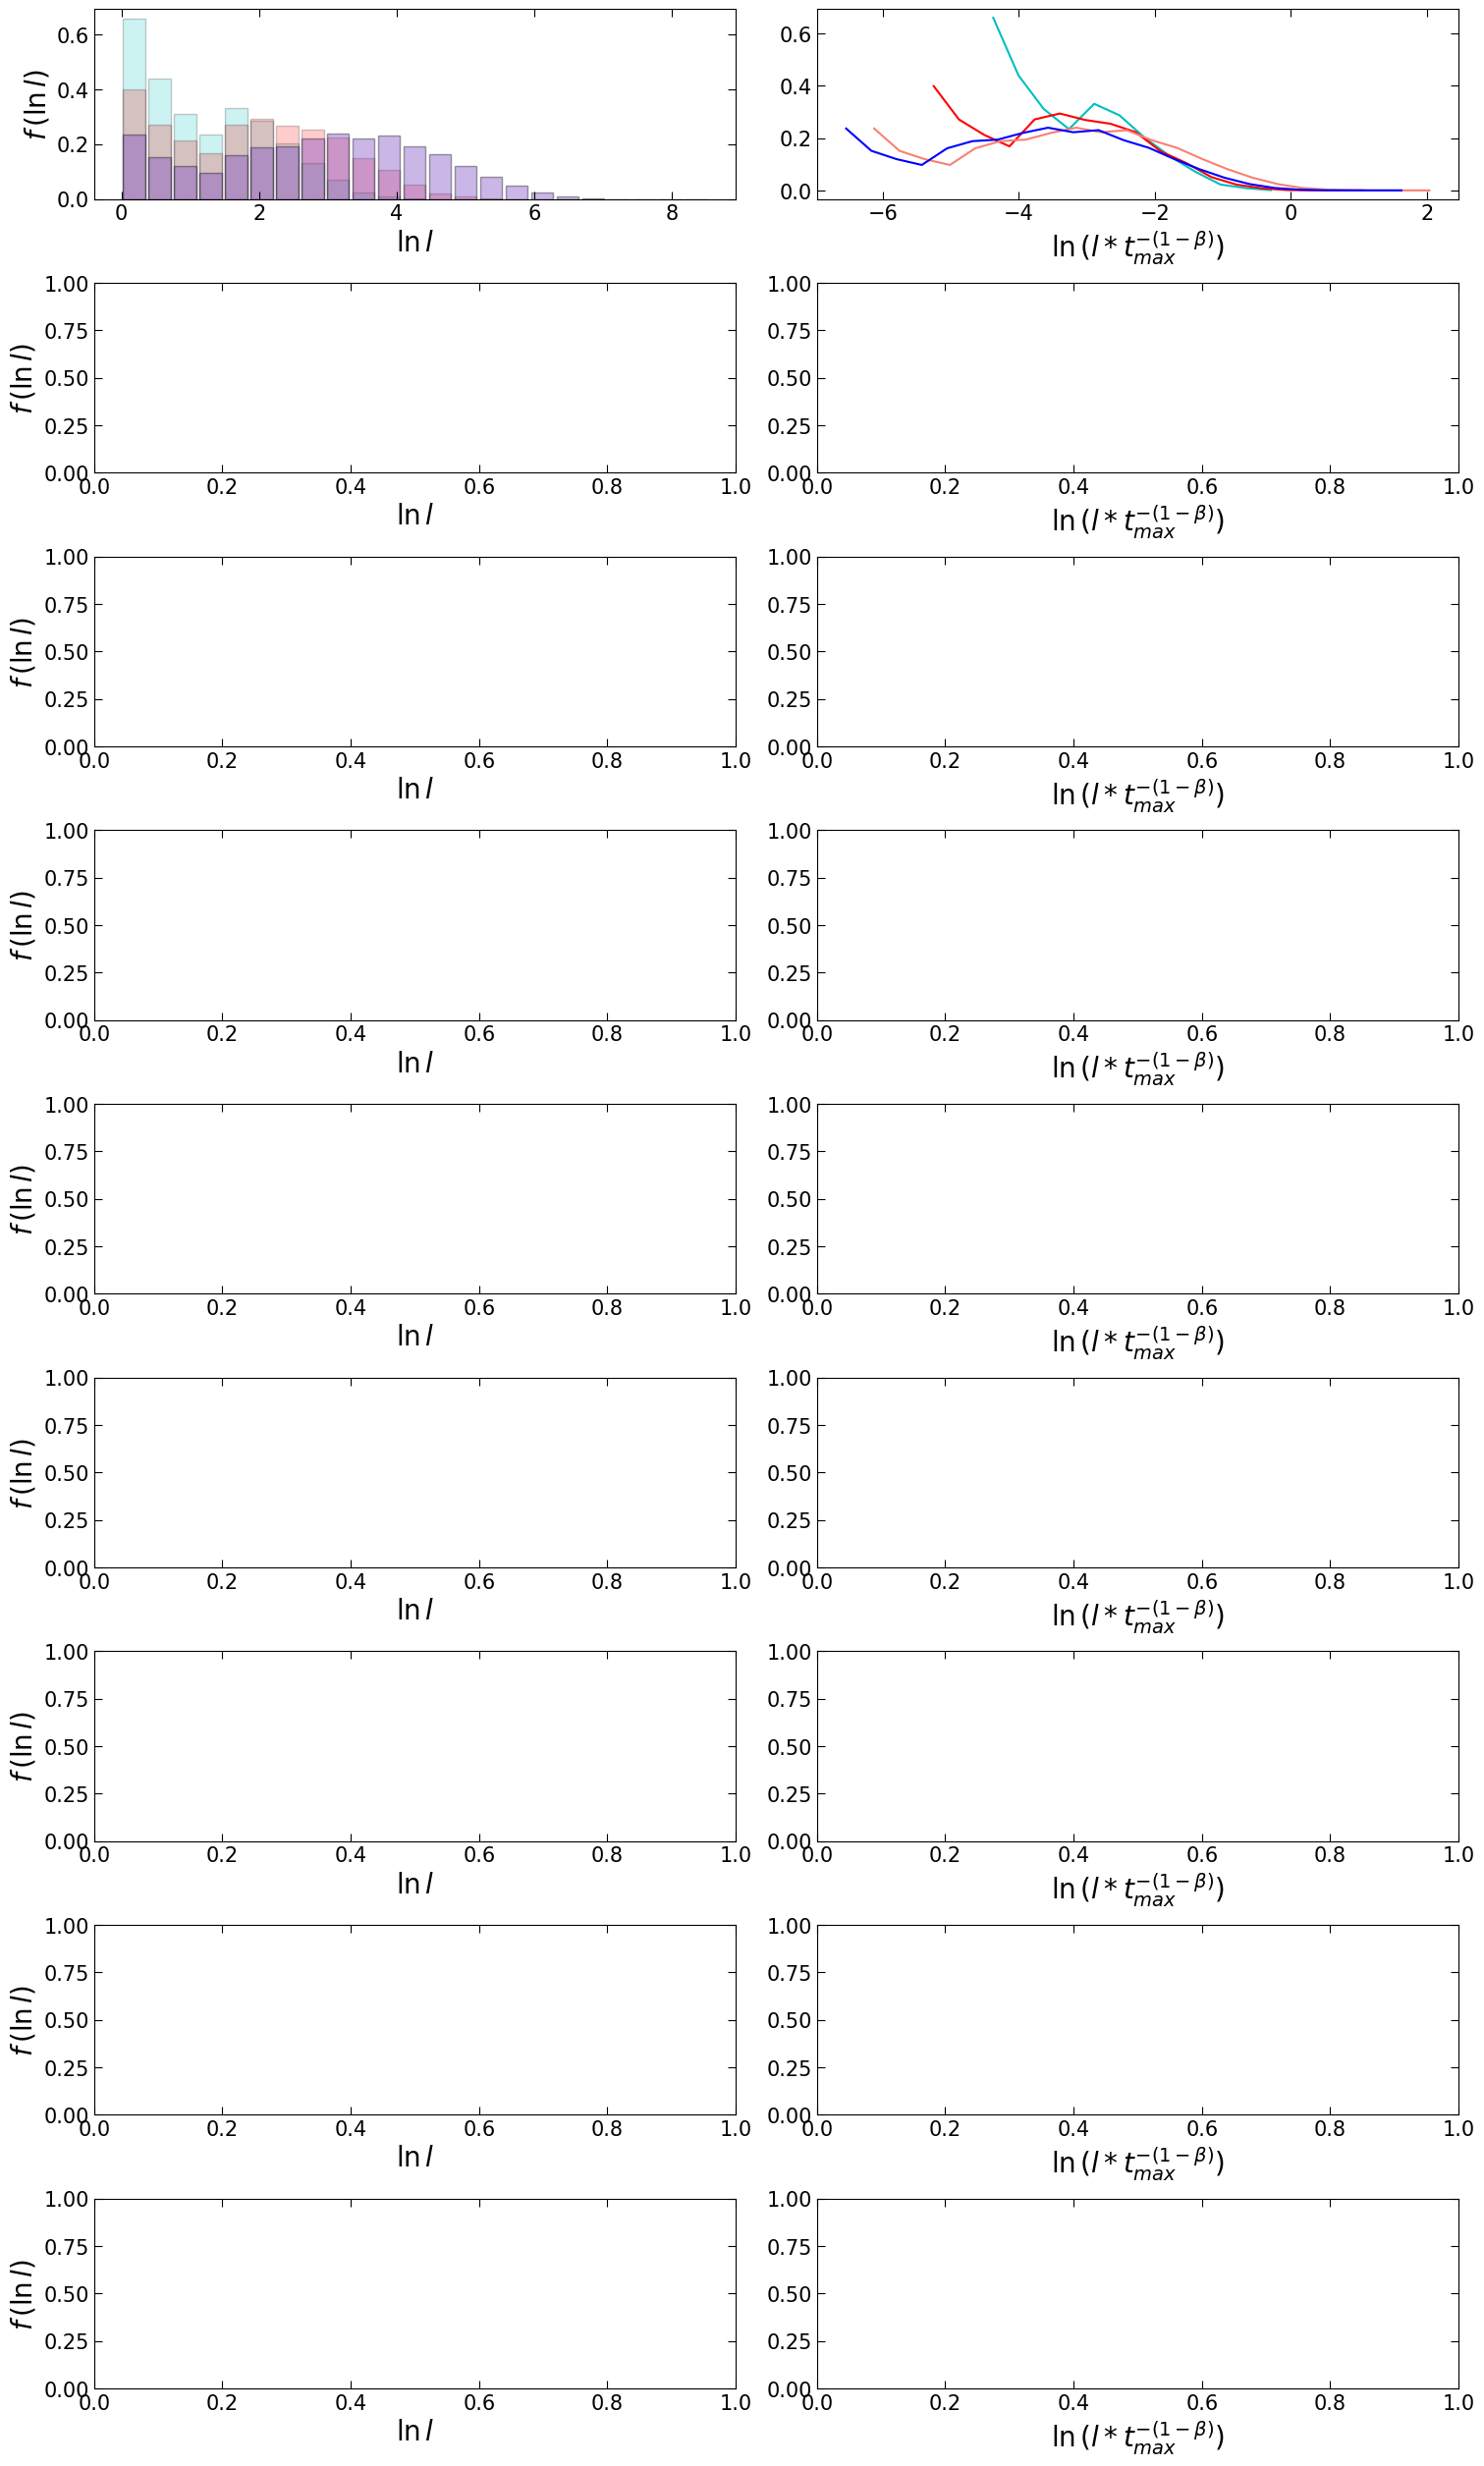

In [32]:
fig, ax = plt.subplots(9, 2,figsize=(15,25),constrained_layout=True)
for i in range(0,9):
    ax[i][0].set_xlabel(r'$\ln{l}$',fontsize=20)
    ax[i][0].set_ylabel(r'$f\,(\ln{l}$)',fontsize=20)
    ax[i][1].set_xlabel(r'$\ln{(l*t_{max}^{-(1-\beta)})}$',fontsize=20)
    #ax[i][1].set_ylabel(r'$f\,(\ln{l}$)',fontsize=20)
    ax[i][0].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=6,labelsize=15)
    ax[i][1].tick_params(axis='both',top=True, bottom=True,right= True, 
               labeltop=False, labelbottom=True,direction='in',length=6,labelsize=15)
# Wikipedia
n105,b105,p=ax[0][0].hist(dels_105,density=True, bins=bins_105, color='c',alpha=0.2, rwidth=0.85,edgecolor='black',label=r'$t_{min}=10^{0},t_{max}=10^{5}$')
n106,b106,p=ax[0][0].hist(dels_106,density=True, bins=bins_106, color='red',alpha=0.2, rwidth=0.85,edgecolor='black',label=r'$t_{min}=10^{0},t_{max}=10^{6}$')
n107,bins_107,p=ax[0][0].hist(dels_107,density=True, bins=bins_107, color='salmon',alpha=0.2, rwidth=0.85,edgecolor='black',label=r'$t_{min}=10^{0},t_{max}=10^{7}$')
nfull,bins_full,p=ax[0][0].hist(dels_full,density=True, bins=bins_full, color='blue',alpha=0.2, rwidth=0.85,edgecolor='black',label=r'$t_{min}=10^{0},t_{max}=2.9\times 10^{7}$')


ax[0][1].plot(bins_105[:-1]+np.log(100000**(-gammafull)),n105,color = 'c',label=r'$t_{min}=10^{0},t_{max}=10^{5},\beta = 0.62$')
ax[0][1].plot(bins_106[:-1]+np.log(1000000**(-gammafull)),n106,color = 'red',label=r'$t_{min}=10^{0},t_{max}=10^{6},\beta = 0.62$')
ax[0][1].plot(bins_107[:-1]+np.log(10000000**(-gammafull)),n107,color = 'salmon',label=r'$t_{min}=10^{0},t_{max}=10^{7},\beta =0.62$')
ax[0][1].plot(bins_full[:-1]+np.log(29606113**(-gammafull)),nfull,color = 'blue',label=r'$t_{min}=10^{0},t_{max}=2.9\times 10^{7},\beta =0.62$')

#Gutenberg
#The Pilgrim Progress
#Twitter Hashtags
#Twitter Users
#Last FM
#Github Users
#Github Repositories
#UMST

#ax[2][0].legend(prop={'size': 12})


#plt.savefig('scaling_wikipedia.png')
plt.show()